In [36]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

In [37]:
# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [6]:
!pip install tensorflow

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [39]:
#plotting
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [64]:
df=pd.read_csv("BTC-USD.csv")

In [41]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3574,2024-06-30,60888.445313,62892.828125,60632.949219,62678.292969,62678.292969,17333226409
3575,2024-07-01,62673.605469,63777.226563,62495.511719,62851.980469,62851.980469,25468379421
3576,2024-07-02,62844.410156,63203.359375,61752.746094,62029.015625,62029.015625,20151616992
3577,2024-07-03,62034.332031,62187.703125,59419.386719,60173.921875,60173.921875,29756701685


In [42]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [43]:
print("Total number of days present in dataset:",df.shape[0])
print("Total number of fields present in the dataset:",df.shape[1])

Total number of days present in dataset: 3579
Total number of fields present in the dataset: 7


In [44]:
df.shape

(3579, 7)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3579 entries, 0 to 3578
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3579 non-null   object 
 1   Open       3579 non-null   float64
 2   High       3579 non-null   float64
 3   Low        3579 non-null   float64
 4   Close      3579 non-null   float64
 5   Adj Close  3579 non-null   float64
 6   Volume     3579 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 195.9+ KB


In [46]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3579.000000,3579.000000,3579.000000,3579.000000,3579.000000,3.579000e+03
mean,16910.465457,17296.261910,16497.574866,16925.343047,16925.343047,1.731818e+10
std,18802.581314,19227.012873,18334.033821,18810.986298,18810.986298,1.917512e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1052.405029,1079.729981,1037.085022,1054.325012,1054.325012,2.510190e+08
50%,8852.780273,9081.279297,8677.316406,8864.766602,8864.766602,1.328114e+10
75%,27796.959961,28336.328125,27253.883789,27808.447265,27808.447265,2.790441e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,3.509679e+11


In [47]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [48]:
df.shape

(3579, 7)

In [49]:
sd=df.iloc[0][0]
ed=df.iloc[-1][0]
print("Starting date:",sd)
print("End date:",ed)

Starting date: 2014-09-17
End date: 2024-07-04


C:\Users\89339\AppData\Local\Temp\ipykernel_29136\1282837128.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\89339\AppData\Local\Temp\ipykernel_29136\1282837128.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



# Analysis of 2014

In [60]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Convert the 'Date' column to numpy array to avoid future warnings
df['Date'] = np.array(df['Date'], dtype='datetime64')

# Filter data for the year 2014
y_2014 = df.loc[(df['Date'] >= '2014-09-17') & (df['Date'] < '2014-12-31')]
y_2014 = y_2014.drop(columns=['Adj Close', 'Volume'])

In [51]:
monthwise=y_2014.groupby(y_2014['Date'].dt.strftime ('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
monthwise=monthwise.reindex(new_order,axis=0)

In [52]:
monthwise

,Open,Close
Date,,
January,NaN,NaN
February,NaN,NaN
March,NaN,NaN
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,412.654003,407.182428


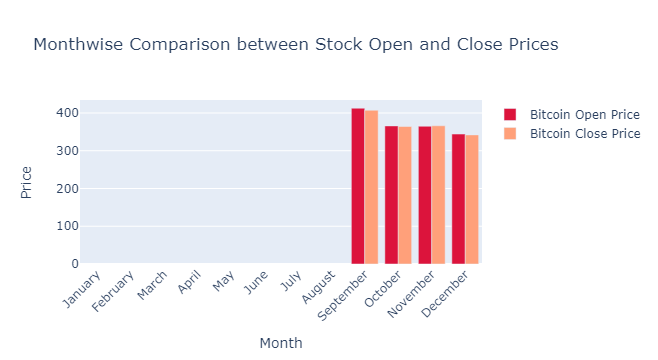

In [53]:
# Create the figure
fig = go.Figure()

# Add trace for stock open prices
fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))

# Add trace for stock close prices
fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Monthwise Comparison between Stock Open and Close Prices',
    xaxis_title='Month',
    yaxis_title='Price'
)

# Show the plot
fig.show()

In [54]:
monthwise_high = y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['High'].max()
monthwise_low = y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()


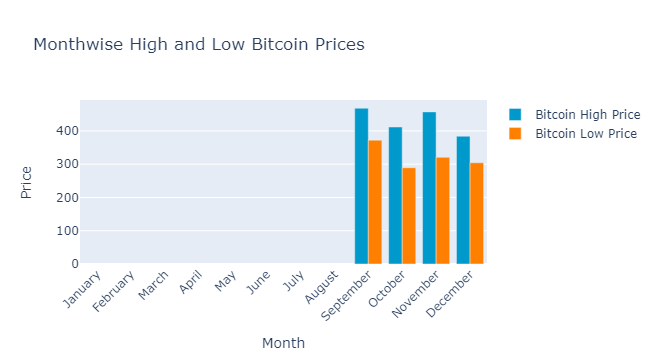

In [55]:
monthwise_high = monthwise_high.reindex(new_order)
monthwise_low = monthwise_low.reindex(new_order)

# Create the figure
fig = go.Figure()

# Add trace for monthly high prices
fig.add_trace(go.Bar(
    x=monthwise_high.index,
    y=monthwise_high,
    name='Bitcoin High Price',
    marker_color='rgb(0, 153, 204)'
))

# Add trace for monthly low prices
fig.add_trace(go.Bar(
    x=monthwise_low.index,
    y=monthwise_low,
    name='Bitcoin Low Price',
    marker_color='rgb(255, 128, 0)'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    title='Monthwise High and Low Bitcoin Prices',
    xaxis_title='Month',
    yaxis_title='Price',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

In [56]:
names = cycle(['Bitcoin Open Price', 'Bitcoin Close Price', 'Bitcoin High Price', 'Bitcoin Low Price'])

C:\Users\89339\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



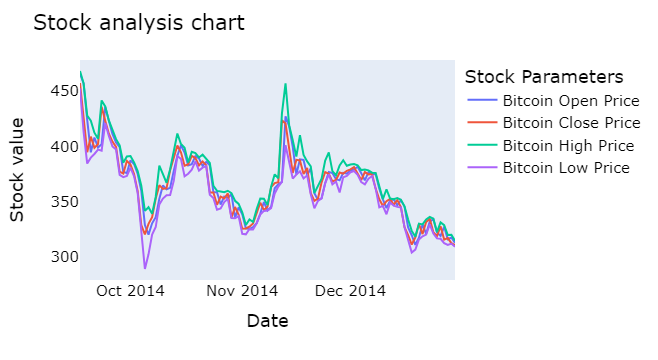

In [62]:
fig = px.line(y_2014, x='Date', y=['Open', 'Close', 'High', 'Low'],
              labels={'Date': 'Date', 'value': 'Stock value'})
fig.update_layout(
    title_text='Stock analysis chart',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters'
)

# Update the trace names
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Update the axes to hide the grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()


# Analysis for 2015

In [73]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Convert the 'Date' column to numpy array to avoid future warnings
df['Date'] = np.array(df['Date'], dtype='datetime64')

# Filter data for the year 2014
y_2015 = df.loc[(df['Date'] >= '2015-01-01') & (df['Date'] < '2015-12-31')]
y_2015 = y_2015.drop(columns=['Adj Close', 'Volume'])

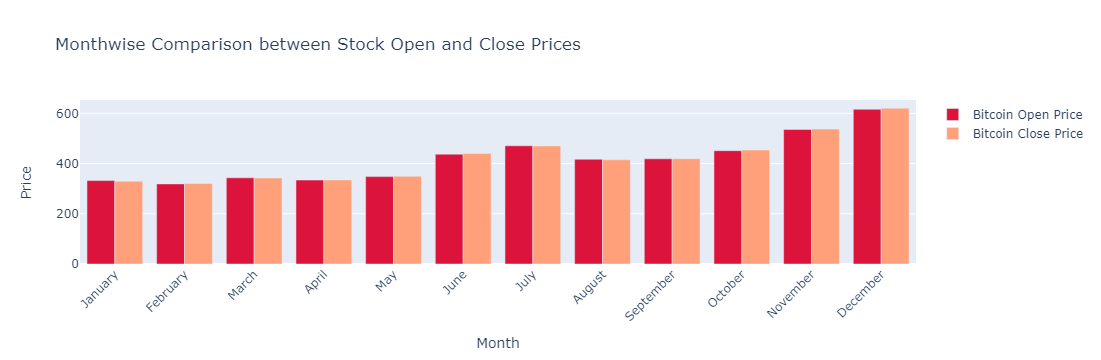

In [70]:
monthwise=y_2015.groupby(y_2015['Date'].dt.strftime ('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
monthwise=monthwise.reindex(new_order,axis=0)
fig = go.Figure()

# Add trace for stock open prices
fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))

# Add trace for stock close prices
fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Monthwise Comparison between Stock Open and Close Prices',
    xaxis_title='Month',
    yaxis_title='Price'
)

# Show the plot
fig.show()

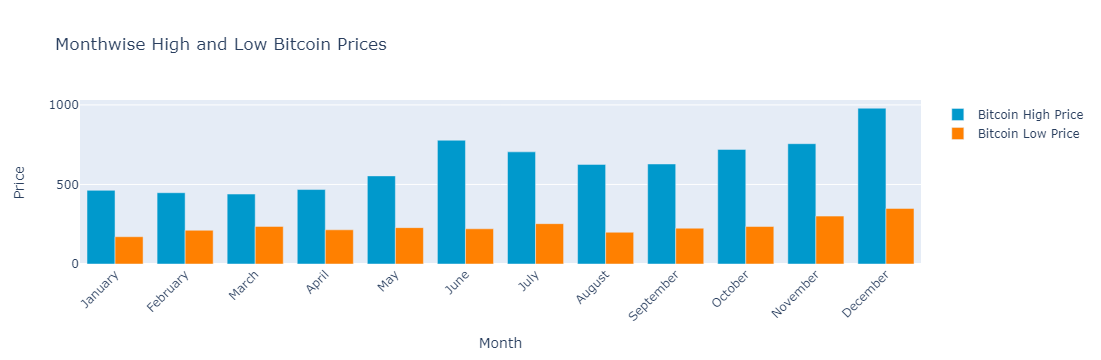

In [71]:
monthwise_high = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['High'].max()
monthwise_low = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthwise_high = monthwise_high.reindex(new_order)
monthwise_low = monthwise_low.reindex(new_order)

# Create the figure
fig = go.Figure()

# Add trace for monthly high prices
fig.add_trace(go.Bar(
    x=monthwise_high.index,
    y=monthwise_high,
    name='Bitcoin High Price',
    marker_color='rgb(0, 153, 204)'
))

# Add trace for monthly low prices
fig.add_trace(go.Bar(
    x=monthwise_low.index,
    y=monthwise_low,
    name='Bitcoin Low Price',
    marker_color='rgb(255, 128, 0)'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    title='Monthwise High and Low Bitcoin Prices',
    xaxis_title='Month',
    yaxis_title='Price',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

C:\Users\89339\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



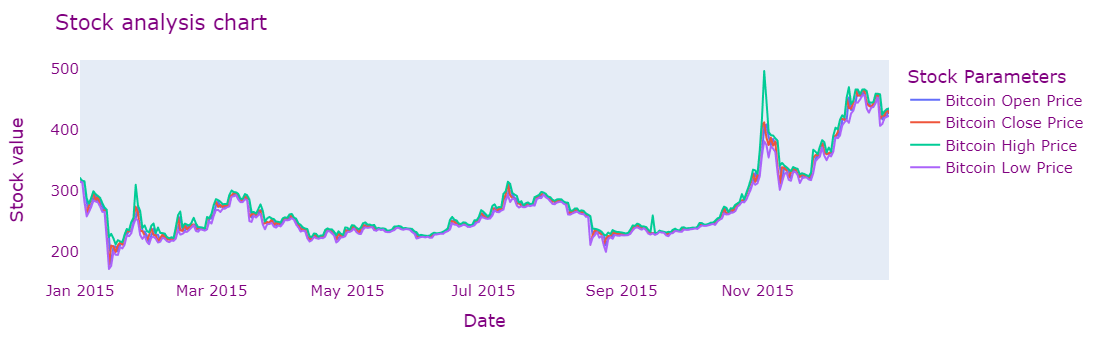

In [74]:
names = cycle(['Bitcoin Open Price', 'Bitcoin Close Price', 'Bitcoin High Price', 'Bitcoin Low Price'])
fig = px.line(y_2015, x='Date', y=['Open', 'Close', 'High', 'Low'],
              labels={'Date': 'Date', 'value': 'Stock value'})
fig.update_layout(
    title_text='Stock analysis chart',
    font_size=15,
    font_color='purple',
    legend_title_text='Stock Parameters'
)

# Update the trace names
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Update the axes to hide the grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()


# Analysis for 2016

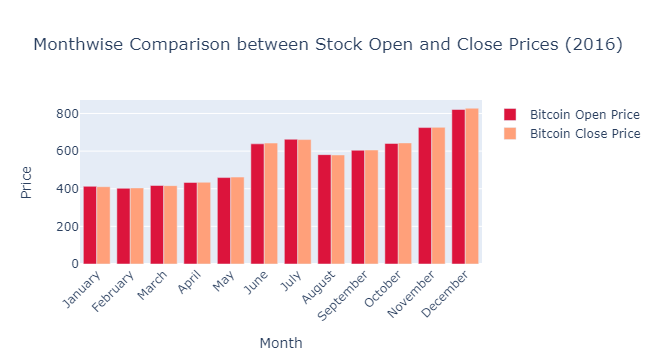

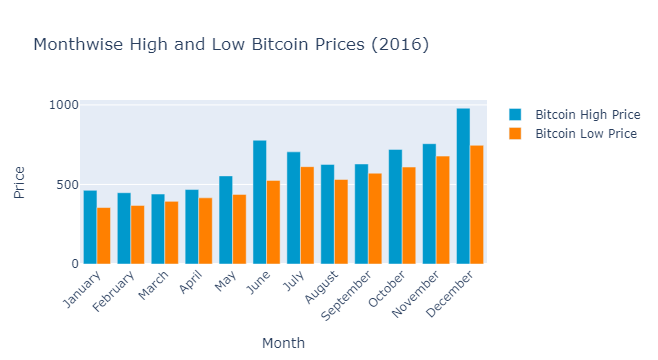

C:\Users\89339\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



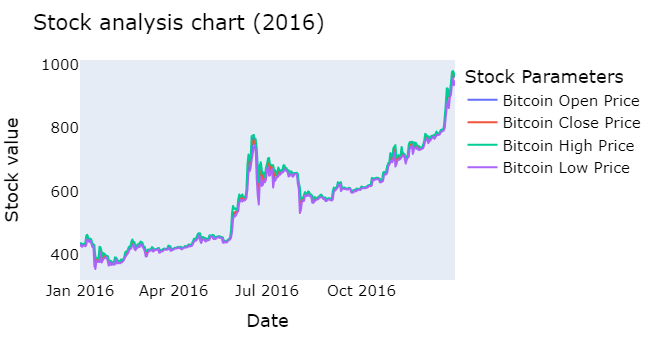

In [75]:
# Filter data for the year 2016
y_2016 = df.loc[(df['Date'] >= '2016-01-01') & (df['Date'] < '2017-01-01')]
y_2016 = y_2016.drop(columns=['Adj Close', 'Volume'])

# Convert the 'Date' column to numpy array to avoid future warnings
y_2016['Date'] = np.array(y_2016['Date'], dtype='datetime64')

# Group data by month and calculate mean for 'Open' and 'Close' prices
monthwise_2016 = y_2016.groupby(y_2016['Date'].astype(str).str[:7])[['Open', 'Close']].mean()
monthwise_2016.index = pd.to_datetime(monthwise_2016.index)
monthwise_2016.index = monthwise_2016.index.strftime('%B')
monthwise_2016 = monthwise_2016.reindex(new_order, axis=0)

# Create the figure for monthwise open and close prices
fig = go.Figure()

# Add trace for stock open prices
fig.add_trace(go.Bar(
    x=monthwise_2016.index,
    y=monthwise_2016['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))

# Add trace for stock close prices
fig.add_trace(go.Bar(
    x=monthwise_2016.index,
    y=monthwise_2016['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Monthwise Comparison between Stock Open and Close Prices (2016)',
    xaxis_title='Month',
    yaxis_title='Price'
)

# Show the plot
fig.show()

# Group data by month and calculate max 'High' and min 'Low' prices
monthwise_high_2016 = y_2016.groupby(y_2016['Date'].astype(str).str[:7])['High'].max()
monthwise_low_2016 = y_2016.groupby(y_2016['Date'].astype(str).str[:7])['Low'].min()
monthwise_high_2016.index = pd.to_datetime(monthwise_high_2016.index)
monthwise_low_2016.index = pd.to_datetime(monthwise_low_2016.index)
monthwise_high_2016.index = monthwise_high_2016.index.strftime('%B')
monthwise_low_2016.index = monthwise_low_2016.index.strftime('%B')
monthwise_high_2016 = monthwise_high_2016.reindex(new_order)
monthwise_low_2016 = monthwise_low_2016.reindex(new_order)

# Create the figure for monthwise high and low prices
fig = go.Figure()

# Add trace for monthly high prices
fig.add_trace(go.Bar(
    x=monthwise_high_2016.index,
    y=monthwise_high_2016,
    name='Bitcoin High Price',
    marker_color='rgb(0, 153, 204)'
))

# Add trace for monthly low prices
fig.add_trace(go.Bar(
    x=monthwise_low_2016.index,
    y=monthwise_low_2016,
    name='Bitcoin Low Price',
    marker_color='rgb(255, 128, 0)'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    title='Monthwise High and Low Bitcoin Prices (2016)',
    xaxis_title='Month',
    yaxis_title='Price',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

# Create the names cycle
names = cycle(['Bitcoin Open Price', 'Bitcoin Close Price', 'Bitcoin High Price', 'Bitcoin Low Price'])

# Create the line plot for daily prices in 2016
fig = px.line(y_2016, x='Date', y=['Open', 'Close', 'High', 'Low'],
              labels={'Date': 'Date', 'value': 'Stock value'})

# Update layout for the line plot
fig.update_layout(
    title_text='Stock analysis chart (2016)',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters'
)

# Update the trace names
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Update the axes to hide the grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()


# Analysis for 2017

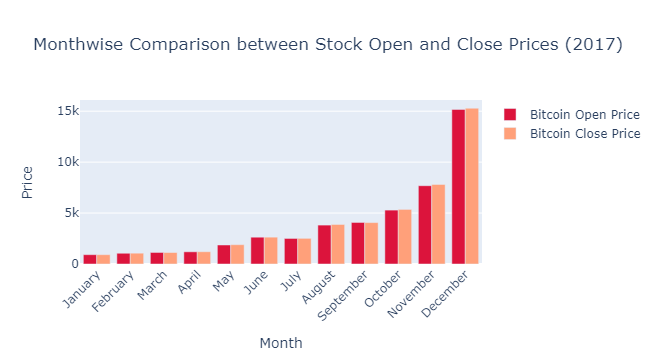

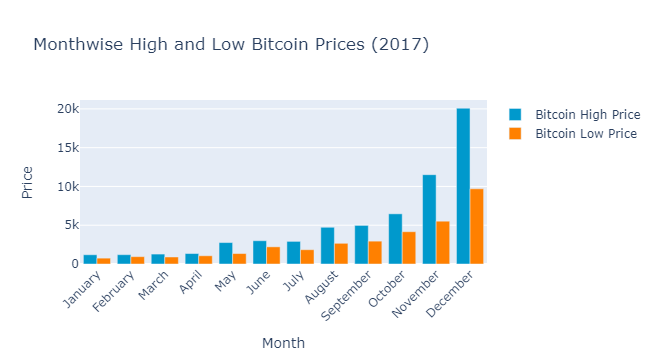

C:\Users\89339\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



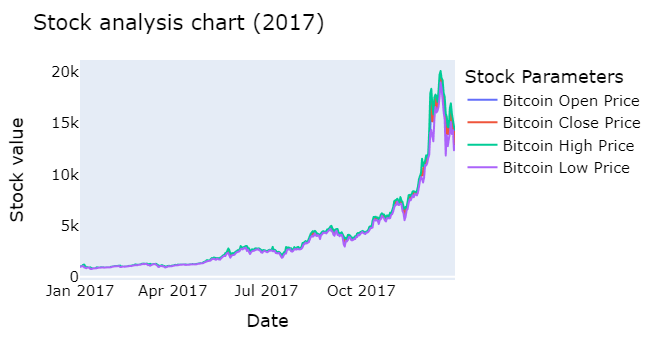

In [76]:
# Filter data for the year 2017
y_2017 = df.loc[(df['Date'] >= '2017-01-01') & (df['Date'] < '2018-01-01')]
y_2017 = y_2017.drop(columns=['Adj Close', 'Volume'])

# Convert the 'Date' column to numpy array to avoid future warnings
y_2017['Date'] = np.array(y_2017['Date'], dtype='datetime64')

# Group data by month and calculate mean for 'Open' and 'Close' prices
monthwise_2017 = y_2017.groupby(y_2017['Date'].astype(str).str[:7])[['Open', 'Close']].mean()
monthwise_2017.index = pd.to_datetime(monthwise_2017.index)
monthwise_2017.index = monthwise_2017.index.strftime('%B')
monthwise_2017 = monthwise_2017.reindex(new_order, axis=0)

# Create the figure for monthwise open and close prices
fig = go.Figure()

# Add trace for stock open prices
fig.add_trace(go.Bar(
    x=monthwise_2017.index,
    y=monthwise_2017['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))

# Add trace for stock close prices
fig.add_trace(go.Bar(
    x=monthwise_2017.index,
    y=monthwise_2017['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Monthwise Comparison between Stock Open and Close Prices (2017)',
    xaxis_title='Month',
    yaxis_title='Price'
)

# Show the plot
fig.show()

# Group data by month and calculate max 'High' and min 'Low' prices
monthwise_high_2017 = y_2017.groupby(y_2017['Date'].astype(str).str[:7])['High'].max()
monthwise_low_2017 = y_2017.groupby(y_2017['Date'].astype(str).str[:7])['Low'].min()
monthwise_high_2017.index = pd.to_datetime(monthwise_high_2017.index)
monthwise_low_2017.index = pd.to_datetime(monthwise_low_2017.index)
monthwise_high_2017.index = monthwise_high_2017.index.strftime('%B')
monthwise_low_2017.index = monthwise_low_2017.index.strftime('%B')
monthwise_high_2017 = monthwise_high_2017.reindex(new_order)
monthwise_low_2017 = monthwise_low_2017.reindex(new_order)

# Create the figure for monthwise high and low prices
fig = go.Figure()

# Add trace for monthly high prices
fig.add_trace(go.Bar(
    x=monthwise_high_2017.index,
    y=monthwise_high_2017,
    name='Bitcoin High Price',
    marker_color='rgb(0, 153, 204)'
))

# Add trace for monthly low prices
fig.add_trace(go.Bar(
    x=monthwise_low_2017.index,
    y=monthwise_low_2017,
    name='Bitcoin Low Price',
    marker_color='rgb(255, 128, 0)'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    title='Monthwise High and Low Bitcoin Prices (2017)',
    xaxis_title='Month',
    yaxis_title='Price',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

# Create the names cycle
names = cycle(['Bitcoin Open Price', 'Bitcoin Close Price', 'Bitcoin High Price', 'Bitcoin Low Price'])

# Create the line plot for daily prices in 2017
fig = px.line(y_2017, x='Date', y=['Open', 'Close', 'High', 'Low'],
              labels={'Date': 'Date', 'value': 'Stock value'})

# Update layout for the line plot
fig.update_layout(
    title_text='Stock analysis chart (2017)',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters'
)

# Update the trace names
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Update the axes to hide the grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()


# 2018

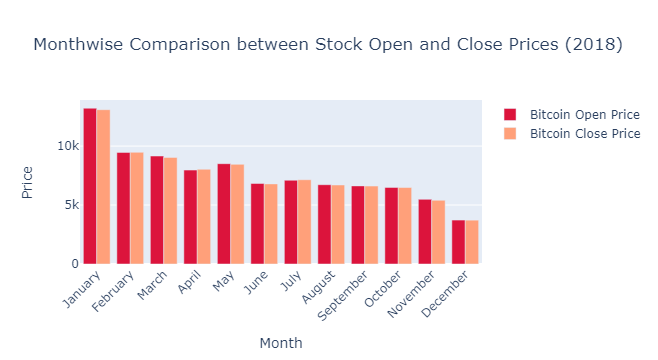

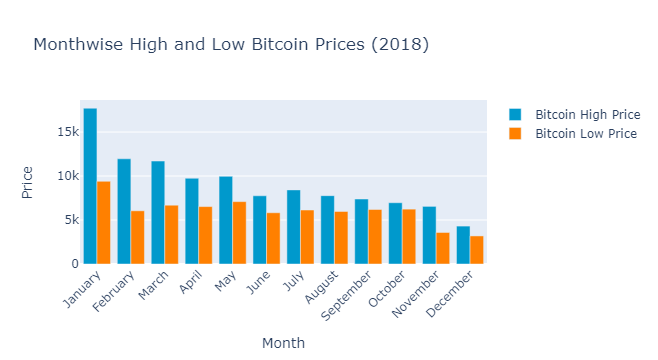

C:\Users\89339\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



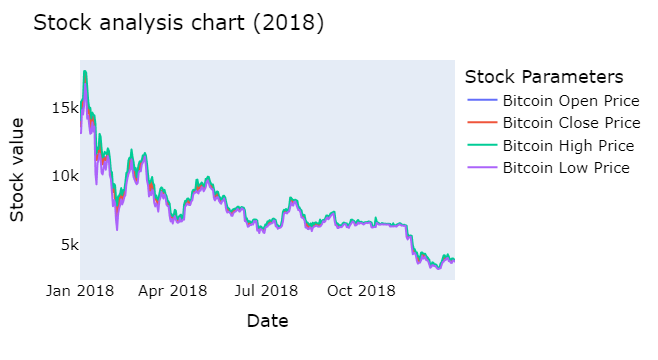

In [77]:
# Filter data for the year 2018
y_2018 = df.loc[(df['Date'] >= '2018-01-01') & (df['Date'] < '2019-01-01')]
y_2018 = y_2018.drop(columns=['Adj Close', 'Volume'])

# Convert the 'Date' column to numpy array to avoid future warnings
y_2018['Date'] = np.array(y_2018['Date'], dtype='datetime64')

# Group data by month and calculate mean for 'Open' and 'Close' prices
monthwise_2018 = y_2018.groupby(y_2018['Date'].astype(str).str[:7])[['Open', 'Close']].mean()
monthwise_2018.index = pd.to_datetime(monthwise_2018.index)
monthwise_2018.index = monthwise_2018.index.strftime('%B')
monthwise_2018 = monthwise_2018.reindex(new_order, axis=0)

# Create the figure for monthwise open and close prices
fig = go.Figure()

# Add trace for stock open prices
fig.add_trace(go.Bar(
    x=monthwise_2018.index,
    y=monthwise_2018['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))

# Add trace for stock close prices
fig.add_trace(go.Bar(
    x=monthwise_2018.index,
    y=monthwise_2018['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Monthwise Comparison between Stock Open and Close Prices (2018)',
    xaxis_title='Month',
    yaxis_title='Price'
)

# Show the plot
fig.show()

# Group data by month and calculate max 'High' and min 'Low' prices
monthwise_high_2018 = y_2018.groupby(y_2018['Date'].astype(str).str[:7])['High'].max()
monthwise_low_2018 = y_2018.groupby(y_2018['Date'].astype(str).str[:7])['Low'].min()
monthwise_high_2018.index = pd.to_datetime(monthwise_high_2018.index)
monthwise_low_2018.index = pd.to_datetime(monthwise_low_2018.index)
monthwise_high_2018.index = monthwise_high_2018.index.strftime('%B')
monthwise_low_2018.index = monthwise_low_2018.index.strftime('%B')
monthwise_high_2018 = monthwise_high_2018.reindex(new_order)
monthwise_low_2018 = monthwise_low_2018.reindex(new_order)

# Create the figure for monthwise high and low prices
fig = go.Figure()

# Add trace for monthly high prices
fig.add_trace(go.Bar(
    x=monthwise_high_2018.index,
    y=monthwise_high_2018,
    name='Bitcoin High Price',
    marker_color='rgb(0, 153, 204)'
))

# Add trace for monthly low prices
fig.add_trace(go.Bar(
    x=monthwise_low_2018.index,
    y=monthwise_low_2018,
    name='Bitcoin Low Price',
    marker_color='rgb(255, 128, 0)'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    title='Monthwise High and Low Bitcoin Prices (2018)',
    xaxis_title='Month',
    yaxis_title='Price',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

# Create the names cycle
names = cycle(['Bitcoin Open Price', 'Bitcoin Close Price', 'Bitcoin High Price', 'Bitcoin Low Price'])

# Create the line plot for daily prices in 2018
fig = px.line(y_2018, x='Date', y=['Open', 'Close', 'High', 'Low'],
              labels={'Date': 'Date', 'value': 'Stock value'})

# Update layout for the line plot
fig.update_layout(
    title_text='Stock analysis chart (2018)',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters'
)

# Update the trace names
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Update the axes to hide the grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()


# 2019

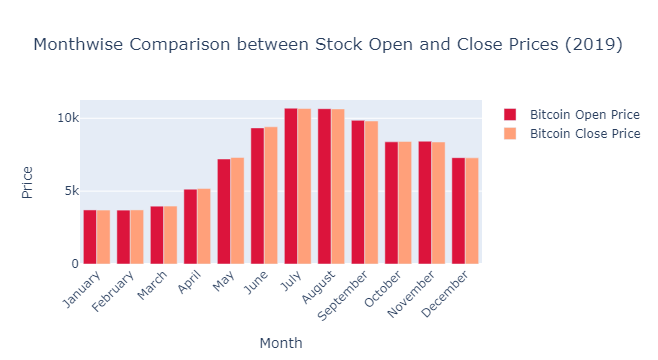

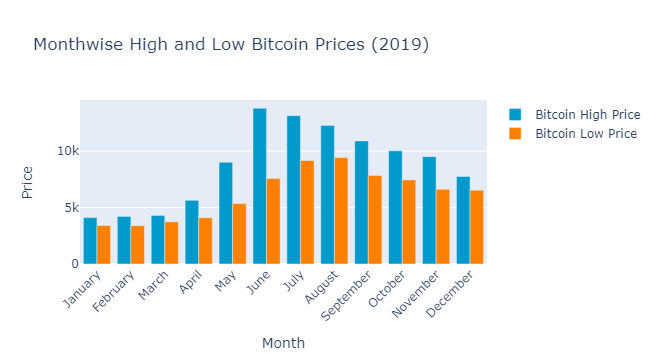

C:\Users\89339\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



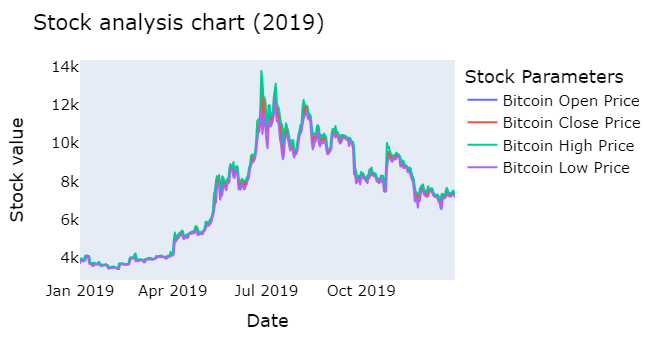

In [78]:
# Filter data for the year 2019
y_2019 = df.loc[(df['Date'] >= '2019-01-01') & (df['Date'] < '2020-01-01')]
y_2019 = y_2019.drop(columns=['Adj Close', 'Volume'])

# Convert the 'Date' column to numpy array to avoid future warnings
y_2019['Date'] = np.array(y_2019['Date'], dtype='datetime64')

# Group data by month and calculate mean for 'Open' and 'Close' prices
monthwise_2019 = y_2019.groupby(y_2019['Date'].astype(str).str[:7])[['Open', 'Close']].mean()
monthwise_2019.index = pd.to_datetime(monthwise_2019.index)
monthwise_2019.index = monthwise_2019.index.strftime('%B')
monthwise_2019 = monthwise_2019.reindex(new_order, axis=0)

# Create the figure for monthwise open and close prices
fig = go.Figure()

# Add trace for stock open prices
fig.add_trace(go.Bar(
    x=monthwise_2019.index,
    y=monthwise_2019['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))

# Add trace for stock close prices
fig.add_trace(go.Bar(
    x=monthwise_2019.index,
    y=monthwise_2019['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Monthwise Comparison between Stock Open and Close Prices (2019)',
    xaxis_title='Month',
    yaxis_title='Price'
)

# Show the plot
fig.show()

# Group data by month and calculate max 'High' and min 'Low' prices
monthwise_high_2019 = y_2019.groupby(y_2019['Date'].astype(str).str[:7])['High'].max()
monthwise_low_2019 = y_2019.groupby(y_2019['Date'].astype(str).str[:7])['Low'].min()
monthwise_high_2019.index = pd.to_datetime(monthwise_high_2019.index)
monthwise_low_2019.index = pd.to_datetime(monthwise_low_2019.index)
monthwise_high_2019.index = monthwise_high_2019.index.strftime('%B')
monthwise_low_2019.index = monthwise_low_2019.index.strftime('%B')
monthwise_high_2019 = monthwise_high_2019.reindex(new_order)
monthwise_low_2019 = monthwise_low_2019.reindex(new_order)

# Create the figure for monthwise high and low prices
fig = go.Figure()

# Add trace for monthly high prices
fig.add_trace(go.Bar(
    x=monthwise_high_2019.index,
    y=monthwise_high_2019,
    name='Bitcoin High Price',
    marker_color='rgb(0, 153, 204)'
))

# Add trace for monthly low prices
fig.add_trace(go.Bar(
    x=monthwise_low_2019.index,
    y=monthwise_low_2019,
    name='Bitcoin Low Price',
    marker_color='rgb(255, 128, 0)'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    title='Monthwise High and Low Bitcoin Prices (2019)',
    xaxis_title='Month',
    yaxis_title='Price',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

# Create the names cycle
names = cycle(['Bitcoin Open Price', 'Bitcoin Close Price', 'Bitcoin High Price', 'Bitcoin Low Price'])

# Create the line plot for daily prices in 2019
fig = px.line(y_2019, x='Date', y=['Open', 'Close', 'High', 'Low'],
              labels={'Date': 'Date', 'value': 'Stock value'})

# Update layout for the line plot
fig.update_layout(
    title_text='Stock analysis chart (2019)',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters'
)

# Update the trace names
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Update the axes to hide the grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()


# 2020